# SHAPE nucleotide reactivity value prediction using Feedforward Neural Network
---



## Requirements:
- Python 3
- Dictionaries & Lists
- Numpy
- Pandas
- Pytorch

## Software Used:
-	Google Colab or Jupyter Notebook


### Importing Relevant Libraries


---


Note: 
- If You do no have them installed, Run **!pip install "Library Name here"**. For Example, if I want to install **numpy**, I will write !pip install numpy


In [1]:
import numpy as np
import pandas as pd
import random
import json
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
wandb login

SyntaxError: invalid syntax (2257962330.py, line 1)

In [3]:
import wandb

wandb.init(project="test-project", entity="ntuwb")

wandb: Currently logged in as: irisxinran (ntuwb). Use `wandb login --relogin` to force relogin


In [4]:
wandb.config = {
  "learning_rate": 0.001,
  "epochs": 100,
  "batch_size": 128
}


### Creating Training Data: 
We will transform the data into a format that our PyTorch Model can Easily Understand


20 x : 1 y

In [59]:
# Sliding window with window size 21, the middle value as target value y, the other 20 values as x
# xxxxxxxxxxyxxxxxxxxxx

X = []
y = []
window_size = 21


def sliding_window_extraction(df):
    global c
    length = df.shape[0]
    print(df.shape[0])
    for index in range(length-20):
        x_i = []
        for k in range(index, index+window_size):
            x_i.append(df['reactivity'][k])
        # remove the 11th element y from 21 elements
        x_i.pop(10)
        #print(x_i)
        X.append(x_i)
        if np.all(x_i == x_i[0]):
            #print(df, index)
            c=c+1
            return False
        y.append(df['reactivity'][index+10])


In [31]:
df = pd.read_csv(entry, delimiter = "\t", header=None, names=["index", "reactivity"])
print(df.shape)
df['reactivity'] = df['reactivity'].replace(-999,-5)
print(df.shape)
df = df.reset_index(drop=True)
print(df)
sliding_window_extraction(df)

NameError: name 'entry' is not defined

In [56]:
X[93]

IndexError: list index out of range

In [62]:
# Read the data file from the folder

entries = os.scandir(r'./shape')
i = 0
c=0
for entry in entries:
    df = pd.read_csv(entry, delimiter = "\t", header=None, names=["index", "reactivity"])
    df['reactivity'] = df['reactivity'].replace(-999,-5)
    if (sliding_window_extraction(df)) == False:
        print(entry)
        print(df)
    i = i+1

print('the number of files: ', i)


75
58
120
55
57
72
57
76
76
161
72
122
75
75
75
158
247
77
76
74
70
157
97
<DirEntry 'Pipeline_1LNG_1.shape'>
    index  reactivity
0       1          -5
1       2          -5
2       3          -5
3       4          -5
4       5          -5
..    ...         ...
92     93          -5
93     94          -5
94     95          -5
95     96          -5
96     97          -5

[97 rows x 2 columns]
92
123
96
59
55
155
55
77
128
101
74
197
61
88
247
71
101
59
59
52
59
72
65
77
75
74
71
94
90
99
<DirEntry 'Pipeline_2GTT_1.shape'>
    index  reactivity
0       1   -5.000000
1       2   -5.000000
2       3   -0.228872
3       4    0.399955
4       5    0.060009
..    ...         ...
94     95   -5.000000
95     96   -5.000000
96     97   -5.000000
97     98   -5.000000
98     99   -5.000000

[99 rows x 2 columns]
99
<DirEntry 'Pipeline_2GTT_2.shape'>
    index  reactivity
0       1          -5
1       2          -5
2       3          -5
3       4          -5
4       5          -5
..    ...     

In [43]:
print('the number of all -999 x: ', c)

the number of all -999 x:  3462


In [28]:
X

[[-999.0,
  -999.0,
  -0.044254,
  0.174412,
  0.028481,
  0.26327,
  0.238318,
  1.543775,
  0.334246,
  0.081736,
  2.423364,
  1.124189,
  0.151453,
  2.946678,
  0.856317,
  0.340136,
  0.089146,
  0.083207,
  1.431363,
  0.303295],
 [-999.0,
  -0.044254,
  0.174412,
  0.028481,
  0.26327,
  0.238318,
  1.543775,
  0.334246,
  0.081736,
  0.267372,
  1.124189,
  0.151453,
  2.946678,
  0.856317,
  0.340136,
  0.089146,
  0.083207,
  1.431363,
  0.303295,
  0.454896],
 [-0.044254,
  0.174412,
  0.028481,
  0.26327,
  0.238318,
  1.543775,
  0.334246,
  0.081736,
  0.267372,
  2.423364,
  0.151453,
  2.946678,
  0.856317,
  0.340136,
  0.089146,
  0.083207,
  1.431363,
  0.303295,
  0.454896,
  0.238207],
 [0.174412,
  0.028481,
  0.26327,
  0.238318,
  1.543775,
  0.334246,
  0.081736,
  0.267372,
  2.423364,
  1.124189,
  2.946678,
  0.856317,
  0.340136,
  0.089146,
  0.083207,
  1.431363,
  0.303295,
  0.454896,
  0.238207,
  2.491291],
 [0.028481,
  0.26327,
  0.238318,
  1.5437

In [20]:
# Dimensions of the data
print(len(X))
print(len(y))
print("x: ", X[1])
print("X size:", len(X[1]))
print("y: ", (y[1]))

24951
24951
x:  [-999.0, -0.044254, 0.174412, 0.028481, 0.26327, 0.238318, 1.543775, 0.334246, 0.081736, 0.267372, 1.124189, 0.151453, 2.946678, 0.856317, 0.340136, 0.089146, 0.083207, 1.431363, 0.303295, 0.454896]
X size: 20
y:  2.423364


In [21]:
# create training data
X_train = []
y_train = []

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=train_size)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=test_size)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [19]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(19960, 20)
(19960,)
(2495, 20)
(2495,)
(2496, 20)
(2496,)


(None, None)

In [44]:
c=0
for x in X:
    if np.all(x == x[0]):
        print(x)
        c = c+1
        

[-999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999]
[-999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999]
[-999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999]
[-999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999]
[-999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999]
[-999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999]
[-999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999]
[-999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999, -999]
[-999, -999, -999, -999, -999, -

In [45]:
print(c)

3462


In [22]:
X_train

[[0.165733,
  0.166509,
  0.731945,
  0.053398,
  0.89109,
  1.144201,
  0.474856,
  1.7375,
  0.724793,
  0.184856,
  0.450997,
  0.53075,
  0.068505,
  -0.122858,
  0.197108,
  1.065573,
  0.223854,
  0.395683,
  0.450812,
  0.227382],
 [-0.115767,
  0.266437,
  0.108839,
  0.311724,
  0.02144,
  -0.067705,
  0.277971,
  0.146452,
  0.131959,
  -0.116881,
  -0.002163,
  -0.009411,
  0.067399,
  0.260873,
  -0.062497,
  -0.34142,
  0.168131,
  0.332062,
  0.266751,
  0.593209],
 [0.105443,
  -0.180636,
  -0.016329,
  0.112736,
  0.900377,
  3.558925,
  0.206583,
  2.051325,
  1.069409,
  0.319496,
  -0.349468,
  0.55026,
  0.342719,
  0.312166,
  0.14613,
  -0.013991,
  0.088058,
  0.318391,
  0.204813,
  0.418375],
 [0.277847,
  0.433213,
  0.301949,
  0.761579,
  0.07181,
  0.070624,
  0.087861,
  0.283929,
  0.772455,
  0.985214,
  0.247773,
  0.725281,
  0.255466,
  2.852139,
  1.678686,
  0.573291,
  2.90032,
  0.172264,
  0.037727,
  0.536471],
 [-0.162625,
  -0.069701,
  0.2196

In [37]:
np.savetxt('./data/X_train_-999to-5.txt',X_train)
np.savetxt('./data/y_train_-999to-5.txt',y_train)
np.savetxt('./data/X_valid_-999to-5.txt',X_valid)
np.savetxt('./data/y_valid_-999to-5.txt',y_valid)
np.savetxt('./data/X_test_-999to-5.txt',X_test)
np.savetxt('./data/y_test_-999to-5.txt',y_test)

# Starting from here for the splited train validation and test dataset

In [5]:
X_train = np.loadtxt("./data/X_train_-999to-5.txt")
y_train = np.loadtxt("./data/y_train_-999to-5.txt")
X_valid = np.loadtxt("./data/X_valid_-999to-5.txt")
y_valid = np.loadtxt("./data/y_valid_-999to-5.txt")
X_test = np.loadtxt("./data/X_test_-999to-5.txt")
y_test = np.loadtxt("./data/y_test_-999to-5.txt")

In [98]:
X_train[2]

array([-5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5., -5.,
       -5., -5., -5., -5., -5., -5., -5.])

In [99]:
c=0
for x in X_train:
    if np.all(x == x[0]):
        c = c+1
print("the percentage of all -5 x samples:", c/X_train.shape[0])

the percentage of all -5 x samples: 0.14053106212424848


In [100]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(19960, 20)
(19960,)
(2495, 20)
(2495,)
(2496, 20)
(2496,)


(None, None)


## PyTorch Model
---
Here we will be making a class to implement our custom neural network. It will be a feed forward neural Network which will have 3 Linear Layers and we will be using activation function “ReLU” . 


### Feed Forward Neural Network

`A feedforward neural network is an artificial neural network wherein connections between the nodes do not form a cycle. As such, it is different from its descendant: recurrent neural networks.`


The feedforward neural network was the first and simplest type of artificial neural network devised In this network, the information moves in only one direction—forward—from the input nodes, through the hidden nodes (if any) and to the output nodes. There are no cycles or loops in the network [1] 




### ReLU Function:
There are a number of widely used activation functions in deep learning today. One of the simplest is the rectified linear unit, or ReLU function, which is a piece wise linear function that outputs zero if its input is negative, and directly outputs the input otherwise:


## Creating our Model
---

In [6]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.l2 = nn.Linear(hidden_size, hidden_size) 
        self.l3 = nn.Linear(hidden_size, hidden_size) 
        self.l4 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        out = self.l4(out)
        # no activation and no softmax at the end
        return out


Here we have inherited a class from NN.Module because we will be customizing the model & its layers


###	Assigning the Dataset to the Model:

In [7]:
class TrainDataset(Dataset):
    def __init__(self):
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

In [8]:
class ValidDataset(Dataset):

    def __init__(self):
        self.n_samples = len(X_valid)
        self.x_data = X_valid
        self.y_data = y_valid

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


###	Hyper Parameters:
Every Neural network has a set of hyper parameters that need to be set before use. 

Before Instantiating our Neural Net Class or Model that we wrote earlier, we will first define some hyper parameters which can be changed accordingly.

In [9]:
# Hyper-parameters 
num_epochs = 300
batch_size = 64
learning_rate = 0.0001
input_size = len(X_train[0])
hidden_size = 8
output_size = 1
print(input_size, output_size)

20 1



###	Loss and optimizer: 
We will now Instantiate the model, loss and optimizer functions.

    Loss Function: Mean Squared Error = MSELoss 
    Optimizer: Stochastic Gradient Descent = SGD Optimizer

In [10]:
train_dataset = TrainDataset()
valid_dataset = ValidDataset()

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNet(input_size, hidden_size, output_size).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
print(len(train_loader))

312


### Test Loss before training

In [12]:
model.eval()

NeuralNet(
  (l1): Linear(in_features=20, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=8, bias=True)
  (l4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [13]:
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)
y_pred = model(X_test)
before_train = criterion(y_pred.squeeze(), y_test)
print('Test Loss before training: ', before_train.item())

Test Loss before training:  3.9726781845092773



## Training the Model
---

In [14]:
# Training the model with Validation
min_valid_loss = np.inf
loss_values = []
valid_loss_values = []

for epoch in range(num_epochs):
    train_loss = 0.0
    for (x, y) in train_loader: # per batch
        x = x.to(dtype=torch.float32).to(device)
        y = y.to(dtype=torch.float32).to(device)
        
        # Forward pass
        outputs = model(x)
        # Find the loss
        loss = criterion(outputs, y)
        
        # Backward and optimize
        # Clear the gradients
        optimizer.zero_grad()
        # Calculate the gradients
        loss.backward()
        # Update weights
        optimizer.step()
        # Record the loss
        loss_values.append(loss.item())
        # Calculate Loss
        train_loss += loss.item()
        wandb.log({"loss": loss})

        # Optional
        wandb.watch(model)
    
    #validation step
    valid_loss = 0.0
    for (x, y) in valid_loader:
        x = x.to(dtype=torch.float32).to(device)
        y = y.to(dtype=torch.float32).to(device)
        
        # Forward pass
        outputs = model(x)
        # Find the loss
        loss = criterion(outputs, y)
        # Record the loss
        valid_loss_values.append(loss.item())
        # Calculate Loss
        valid_loss += loss.item()
        
    if (epoch+1) % 5 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss/ len(train_loader):.4f}, Validation Loss: {valid_loss/ len(valid_loader):.4f}')

    if min_valid_loss > valid_loss:
        print(f'Validation Loss Decreased({min_valid_loss/ len(valid_loader):.4f} ---> {valid_loss/ len(valid_loader):.4f}) \t Saving The Model')
        min_valid_loss = valid_loss
        # Saving State Dict
        data = {
        "model_state": model.state_dict(),
        "input_size": input_size,
        "hidden_size": hidden_size,
        "output_size": output_size,
        }
        FILE = "model.pth"
        torch.save(data, FILE)

print(f'final loss: {loss.item():.4f}')

/home/liuxr/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/liuxr/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([56])) that is different to the input size (torch.Size([56, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/liuxr/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([63])) that is different to the input size (torch.Size([63, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the s

Validation Loss Decreased(inf ---> 4.0848) 	 Saving The Model
Validation Loss Decreased(4.0848 ---> 4.0794) 	 Saving The Model
Validation Loss Decreased(4.0794 ---> 4.0718) 	 Saving The Model
Epoch [5/300], Training Loss: 4.5328, Validation Loss: 4.0688
Validation Loss Decreased(4.0718 ---> 4.0688) 	 Saving The Model
Validation Loss Decreased(4.0688 ---> 4.0686) 	 Saving The Model
Validation Loss Decreased(4.0686 ---> 4.0669) 	 Saving The Model
Validation Loss Decreased(4.0669 ---> 4.0650) 	 Saving The Model
Validation Loss Decreased(4.0650 ---> 4.0597) 	 Saving The Model
Epoch [10/300], Training Loss: 4.5177, Validation Loss: 4.0608
Validation Loss Decreased(4.0597 ---> 4.0584) 	 Saving The Model
Epoch [15/300], Training Loss: 4.5101, Validation Loss: 4.0573
Validation Loss Decreased(4.0584 ---> 4.0573) 	 Saving The Model
Validation Loss Decreased(4.0573 ---> 4.0571) 	 Saving The Model
Validation Loss Decreased(4.0571 ---> 4.0541) 	 Saving The Model
Epoch [20/300], Training Loss: 4.50

wandb: ERROR Summary data exceeds maximum size of 10.4MB. Dropping it.


Epoch [30/300], Training Loss: 4.5040, Validation Loss: 4.0555
Epoch [35/300], Training Loss: 4.5022, Validation Loss: 4.0565
Epoch [40/300], Training Loss: 4.5011, Validation Loss: 4.0571


KeyboardInterrupt: 

In [72]:
type(loss_values)

list

In [73]:
len(valid_loss_values)

27600

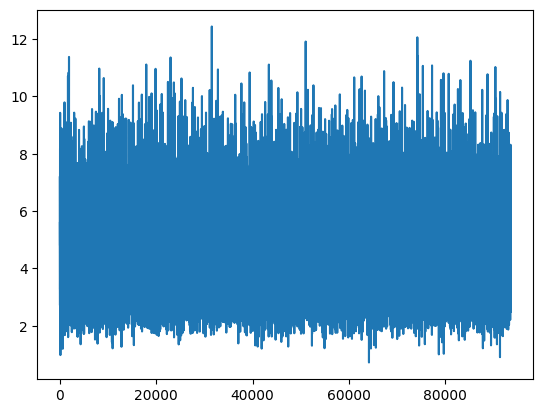

In [110]:
plt.plot(loss_values)

In [111]:
loss_values

[5.58437442779541,
 2.986485242843628,
 7.210728645324707,
 5.124195575714111,
 5.4091715812683105,
 3.4258484840393066,
 5.207309246063232,
 5.0758819580078125,
 3.063180923461914,
 3.6852035522460938,
 5.722493648529053,
 3.6601293087005615,
 3.8626468181610107,
 4.7564287185668945,
 4.99994421005249,
 4.509963512420654,
 2.8263988494873047,
 4.338284492492676,
 2.713833808898926,
 4.587522983551025,
 4.978549480438232,
 5.568040370941162,
 4.091973781585693,
 4.799111843109131,
 5.194056510925293,
 3.269052505493164,
 3.797863483428955,
 5.56374979019165,
 3.7947194576263428,
 8.186502456665039,
 4.337259292602539,
 4.1223464012146,
 5.691437244415283,
 6.254755973815918,
 3.706395387649536,
 5.790964126586914,
 5.979066848754883,
 5.007793426513672,
 4.063312530517578,
 5.533782005310059,
 4.680163860321045,
 4.204311370849609,
 5.531719207763672,
 5.537969589233398,
 4.1517462730407715,
 1.9369945526123047,
 4.8323822021484375,
 2.125047445297241,
 3.234046459197998,
 7.0273180007

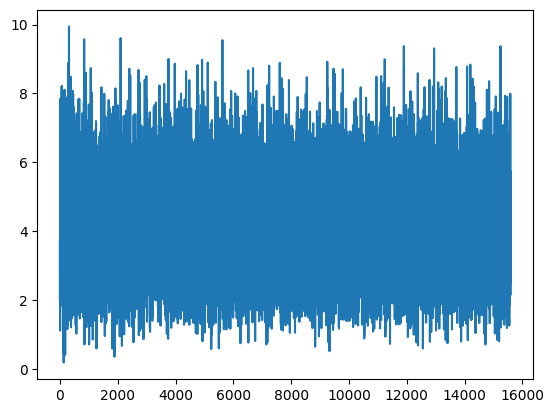

In [95]:
plt.plot(valid_loss_values)

In [81]:
plt.plot(valid_loss_values.index()[::100],valid_loss_values[::100])

TypeError: index expected at least 1 argument, got 0

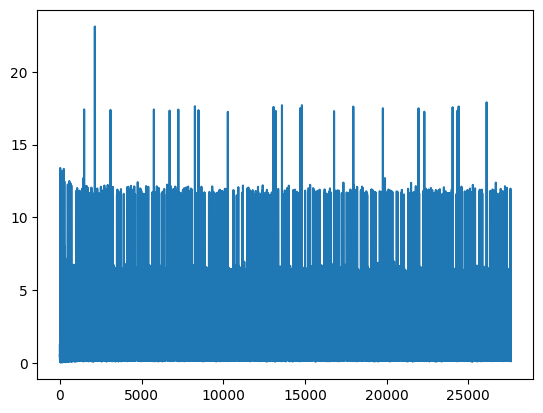

In [80]:
plt.plot(valid_loss_values)
plt.plot(loss_values_b64_e300,'r', label='batch_size: 64', ls='-', ms=20, markevery=100, alpha=0.2)
plt.plot(loss_values,'c', label='batch_size: 16, 2hidden=16', ls='-', ms=20, markevery=100, alpha=0.5)
#don't know why the markevery doesn't work
plt.xlabel('step') 
plt.ylabel('loss') 
plt.title("Loss")
plt.legend()

### Saving the loss and validation loss

In [112]:
#np.savetxt('./data/loss_values_b16_e200_remove-999.txt',loss_values)
#np.savetxt('./data/valid_loss_values_b16_e200_remove-999.txt',valid_loss_values)
#np.savetxt('./data/loss_values_b32_e200.txt',loss_values)
#np.savetxt('./data/valid_loss_values_b32_e200.txt',valid_loss_values)
#np.savetxt('./data/loss_values_b64_e300_remove-999.txt',loss_values)
#np.savetxt('./data/valid_loss_values_b64_e300_remove-999.txt',valid_loss_values)
np.savetxt('./data/loss_values_b64_e300_-999to-5_2hidden.txt',loss_values)
np.savetxt('./data/valid_loss_values_b64_e300_-999to-5_2hidden.txt',valid_loss_values)

In [3]:
loss_values = np.loadtxt("./data/loss_values_b16_e200.txt")
valid_loss_values = np.loadtxt("./data/valid_loss_values_b16_e200.txt")

## More visualisation

In [130]:
loss_values_b16_e200 = np.loadtxt("./data/loss_values_b16_e200.txt")
valid_loss_values_b16_e200 = np.loadtxt("./data/valid_loss_values_b16_e200.txt")
loss_values_b32_e200 = np.loadtxt("./data/loss_values_b32_e200.txt")
valid_loss_values_b32_e200 = np.loadtxt("./data/valid_loss_values_b32_e200.txt")
loss_values_b64_e300 = np.loadtxt("./data/loss_values_b64_e300.txt")
valid_loss_values_b64_e300 = np.loadtxt("./data/valid_loss_values_b64_e300.txt")
#loss_values_b16_e200 = np.loadtxt("./data/loss_values_b16_e200_-999to-5_2hidden.txt")
#valid_loss_values_b16_e200 = np.loadtxt("./data/valid_loss_values_b16_e200_-999to-5_2hidden.txt")
#loss_values_b32_e200 = np.loadtxt("./data/loss_values_b32_e200_-999to-5_2hidden.txt")
#valid_loss_values_b32_e200 = np.loadtxt("./data/valid_loss_values_b32_e200_-999to-5_2hidden.txt")
#loss_values_b64_e300 = np.loadtxt("./data/loss_values_b64_e300_-999to-5_2hidden.txt")
#valid_loss_values_b64_e300 = np.loadtxt("./data/valid_loss_values_b64_e300_-999to-5_2hidden.txt")

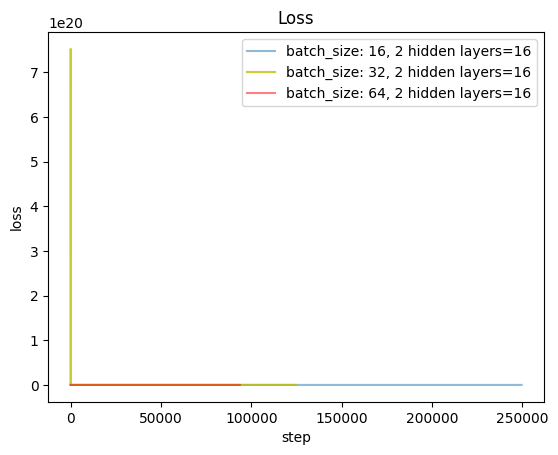

In [131]:
loss_values_b16_e200 = loss_values_b16_e200
loss_values_b32_e200 = loss_values_b32_e200
loss_values_b64_e300 = loss_values_b64_e300
plt.plot(loss_values_b16_e200, label='batch_size: 16, 2 hidden layers=16', ls='-', ms=20, markevery=100, alpha=0.5)
plt.plot(loss_values_b32_e200,'y', label='batch_size: 32, 2 hidden layers=16', ls='-', ms=20, markevery=100, alpha=0.8)
plt.plot(loss_values_b64_e300,'r', label='batch_size: 64, 2 hidden layers=16', ls='-', ms=20, markevery=100, alpha=0.5)
#don't know why the markevery doesn't work
plt.xlabel('step') 
plt.ylabel('loss') 
plt.title("Loss")
plt.legend()
plt.show()

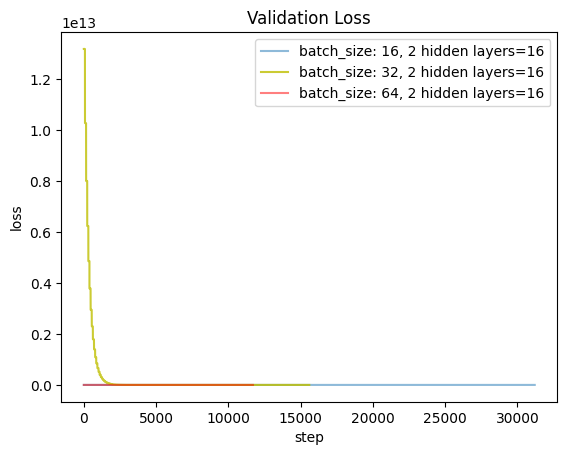

In [132]:
plt.plot(valid_loss_values_b16_e200, label='batch_size: 16, 2 hidden layers=16', ls='-', ms=20, markevery=100, alpha=0.5)
plt.plot(valid_loss_values_b32_e200,'y', label='batch_size: 32, 2 hidden layers=16', ls='-', ms=20, markevery=100, alpha=0.8)
plt.plot(valid_loss_values_b64_e300,'r', label='batch_size: 64, 2 hidden layers=16', ls='-', ms=20, markevery=100, alpha=0.5)
#don't know why the markevery doesn't work
plt.xlabel('step') 
plt.ylabel('loss') 
plt.title("Validation Loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(valid_loss_values_b16_e200[5000:], label='batch_size: 16')
plt.plot(valid_loss_values_b32_e200[5000:],'y', label='batch_size: 32')
plt.plot(valid_loss_values_b64_e300[5000:],'r', label='batch_size: 64')
plt.xlabel('step') 
plt.ylabel('loss') 
plt.title("Validation Loss")
plt.legend()
plt.show()


## Loading our Saved Model
---

In [123]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

FILE = "model.pth"
data = torch.load(FILE)

input_size = data["input_size"]
hidden_size = data["hidden_size"]
output_size = data["output_size"]
model_state = data["model_state"]

model = NeuralNet(input_size, hidden_size, output_size).to(device)
model.load_state_dict(model_state)
model.eval()

NeuralNet(
  (l1): Linear(in_features=20, out_features=8, bias=True)
  (l2): Linear(in_features=8, out_features=8, bias=True)
  (l3): Linear(in_features=8, out_features=8, bias=True)
  (l4): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


 
## Prediction with test dataset:
---

In [124]:
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)
y_pred = model(X_test)
after_train = criterion(y_pred.squeeze(), y_test)
print('Test Loss after training: ', after_train.item())
print('Test Loss before training: ', before_train.item())

Test Loss after training:  4.30657434463501
Test Loss before training:  4.592614650726318


### investigation of the predicted data
the existance of -999 made the model lean towards the negative side.

In [45]:
y_pred_array = y_pred.detach().numpy()

In [46]:

df_describe = pd.DataFrame(y_pred_array)
df_describe.describe()

,0
count,2200.000000
mean,0.630066
std,0.040798
min,0.570898
25%,0.600853
50%,0.623237
75%,0.651423
max,0.794619


In [47]:
df_describe.min()

0    0.570898
dtype: float32

# Bibliography
---


**[1]** 	Wikipedia, "FeedForward Neural Network," Wikipedia, [Online]. Available: https://en.wikipedia.org/wiki/Feedforward_neural_network.

**[2]** 	T. Wood, "Activation Function," DeepAI, [Online]. Available: https://deepai.org/machine-learning-glossary-and-terms/activation-function.
